In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [94]:
res = ResNet50(include_top=False, input_shape=(256, 256, 3), pooling="avg")

In [95]:
# res.summary()

In [96]:
! kaggle

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: too few arguments


In [6]:
! mv kaggle.json /root/.kaggle/kaggle.json

In [7]:
! kaggle

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: too few arguments


In [8]:
! chmod 600 /root/.kaggle/kaggle.json

In [9]:
! kaggle datasets download ellenyusa/4classimages

100% 38.5M/38.5M [00:01<00:00, 23.8MB/s]



In [10]:
! unzip --qq 4classimages.zip

In [11]:
! rm -rf ./data/data

In [97]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [98]:
dg = ImageDataGenerator()

In [113]:
ffd = dg.flow_from_directory("./data", target_size=(256, 256), batch_size=50)

Found 808 images belonging to 4 classes.


In [114]:
X, y = ffd.next()

In [115]:
X.shape

(50, 256, 256, 3)

In [116]:
import matplotlib.pyplot as plt

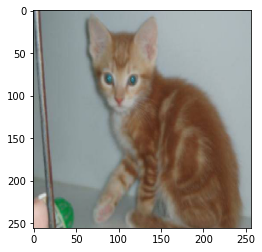

In [117]:
plt.imshow(X[10].astype(int))

In [118]:
y[10]

array([0., 1., 0., 0.], dtype=float32)

In [119]:
ffd.class_indices

{'Humans': 0, 'cats': 1, 'dogs': 2, 'horses': 3}

In [120]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Reshape, Flatten
from tensorflow.keras.losses import categorical_crossentropy

In [121]:
model = Sequential()
model.add(InputLayer(input_shape=(256, 256, 3)))
model.add(res)
model.add(Dense(400, activation="tanh"))
model.add(Dense(200, activation="tanh"))
model.add(Dense(100, activation="tanh"))
model.add(Dense(4, activation="softmax"))

In [122]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [123]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_16 (Dense)             (None, 400)               819600    
_________________________________________________________________
dense_17 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_18 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 404       
Total params: 24,508,016
Trainable params: 920,304
Non-trainable params: 23,587,712
_________________________________________________________________


In [124]:
res.trainable = False

In [125]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_16 (Dense)             (None, 400)               819600    
_________________________________________________________________
dense_17 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_18 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 404       
Total params: 24,508,016
Trainable params: 920,304
Non-trainable params: 23,587,712
_________________________________________________________________


In [126]:
model.fit_generator(ffd, epochs=10, steps_per_epoch=5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
5/5 [==============================] - 8s 455ms/step - loss: 1.6567 - accuracy: 0.4160
Epoch 2/10
5/5 [==============================] - 2s 384ms/step - loss: 0.6205 - accuracy: 0.7500
Epoch 3/10
5/5 [==============================] - 2s 476ms/step - loss: 0.3777 - accuracy: 0.8606
Epoch 4/10
5/5 [==============================] - 2s 455ms/step - loss: 0.2512 - accuracy: 0.9040
Epoch 5/10
5/5 [==============================] - 2s 380ms/step - loss: 0.1326 - accuracy: 0.9567
Epoch 6/10
5/5 [==============================] - 2s 453ms/step - loss: 0.1631 - accuracy: 0.9400
Epoch 7/10
5/5 [==============================] - 2s 450ms/step - loss: 0.1088 - accuracy: 0.9520
Epoch 8/10
5/5 [==============================] - 2s 370ms/step - loss: 0.1555 - accuracy: 0.9471
Epoch 9/10
5/5 [==============================] - 2s 452ms/step - loss: 0.0669 - accuracy: 0.9760
Epoch 10/10
5/5 [==============================] - 2s 450ms/step - loss: 0.0412 - accuracy: 0.9920


In [189]:
import requests

In [192]:
url = "https://avatars.githubusercontent.com/u/25343183"

In [193]:
content = requests.get(url).content

In [194]:
with open("item.jpg", "wb") as f:
  f.write(content)

In [195]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np


In [196]:
img = load_img("item.jpg", target_size=(256, 256))

In [197]:
type(img)

PIL.Image.Image

In [198]:
arr = np.array(img)

In [199]:
arr.shape

(256, 256, 3)

In [200]:
output = model.predict(np.array([arr]))

In [201]:
np.argmax(output, axis=1)

array([0])

In [202]:
ffd.class_indices

{'Humans': 0, 'cats': 1, 'dogs': 2, 'horses': 3}